In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Завантажуємо дані
df = pd.read_csv('weather_classification_data.csv')

In [2]:
# Виведення назв колонок і розміру датасету
print("Назви колонок:", df.columns)
print("Розмір датасета:", df.shape)

Назви колонок: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')
Розмір датасета: (13200, 11)


In [3]:
# Опрацювання пропусків (їх немає у моєму датасеті, бо він заздалегідь оброблений. але про всяк випадок нехай буде)
for column in df.select_dtypes(include=['float64', 'int64']):
    df[column].fillna(df[column].mean(), inplace=True)
for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
# Перетворення категоріальних змінних за допомогою LabelEncoder
label_encoders = {}
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Зберігаємо LabelEncoder для кожної колонки
    
    # Виводимо розшифровку значень
    print(f"Розшифровка для '{col}':")
    for idx, class_ in enumerate(le.classes_):
        print(f"  {idx}: {class_}")

Розшифровка для 'Cloud Cover':
  0: clear
  1: cloudy
  2: overcast
  3: partly cloudy
Розшифровка для 'Season':
  0: Autumn
  1: Spring
  2: Summer
  3: Winter
Розшифровка для 'Location':
  0: coastal
  1: inland
  2: mountain
Розшифровка для 'Weather Type':
  0: Cloudy
  1: Rainy
  2: Snowy
  3: Sunny


In [8]:
# Нормалізація числових значень
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

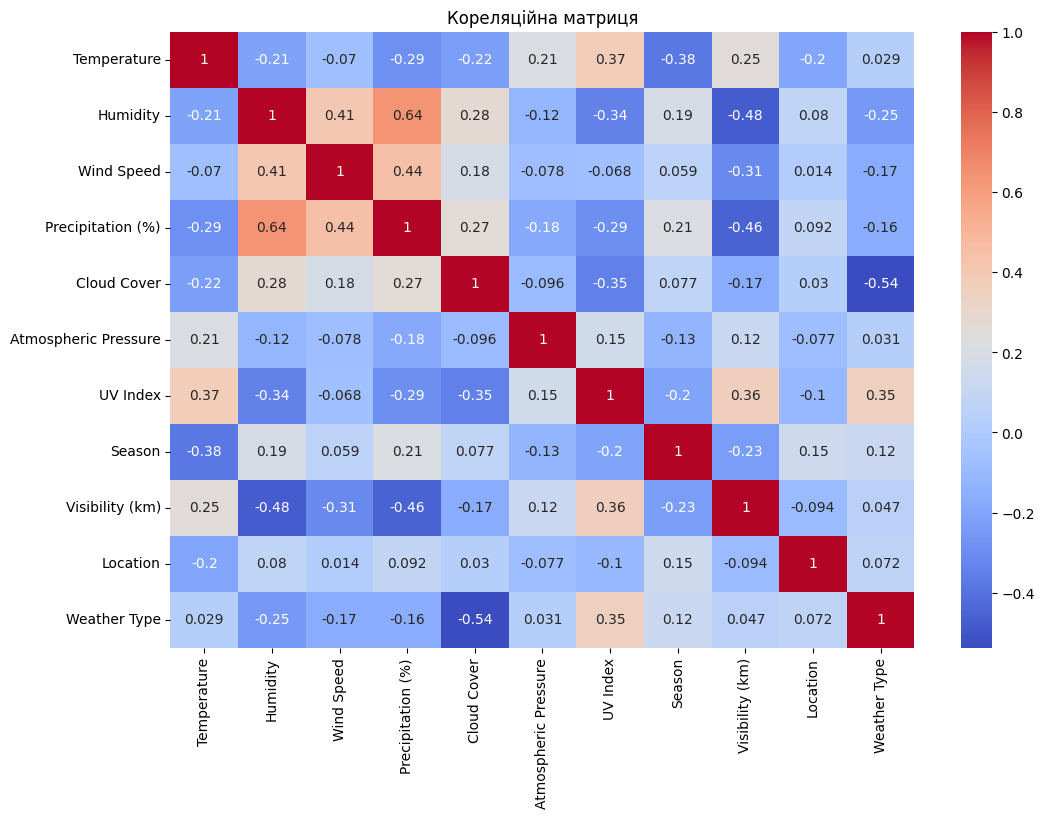

In [11]:
# Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

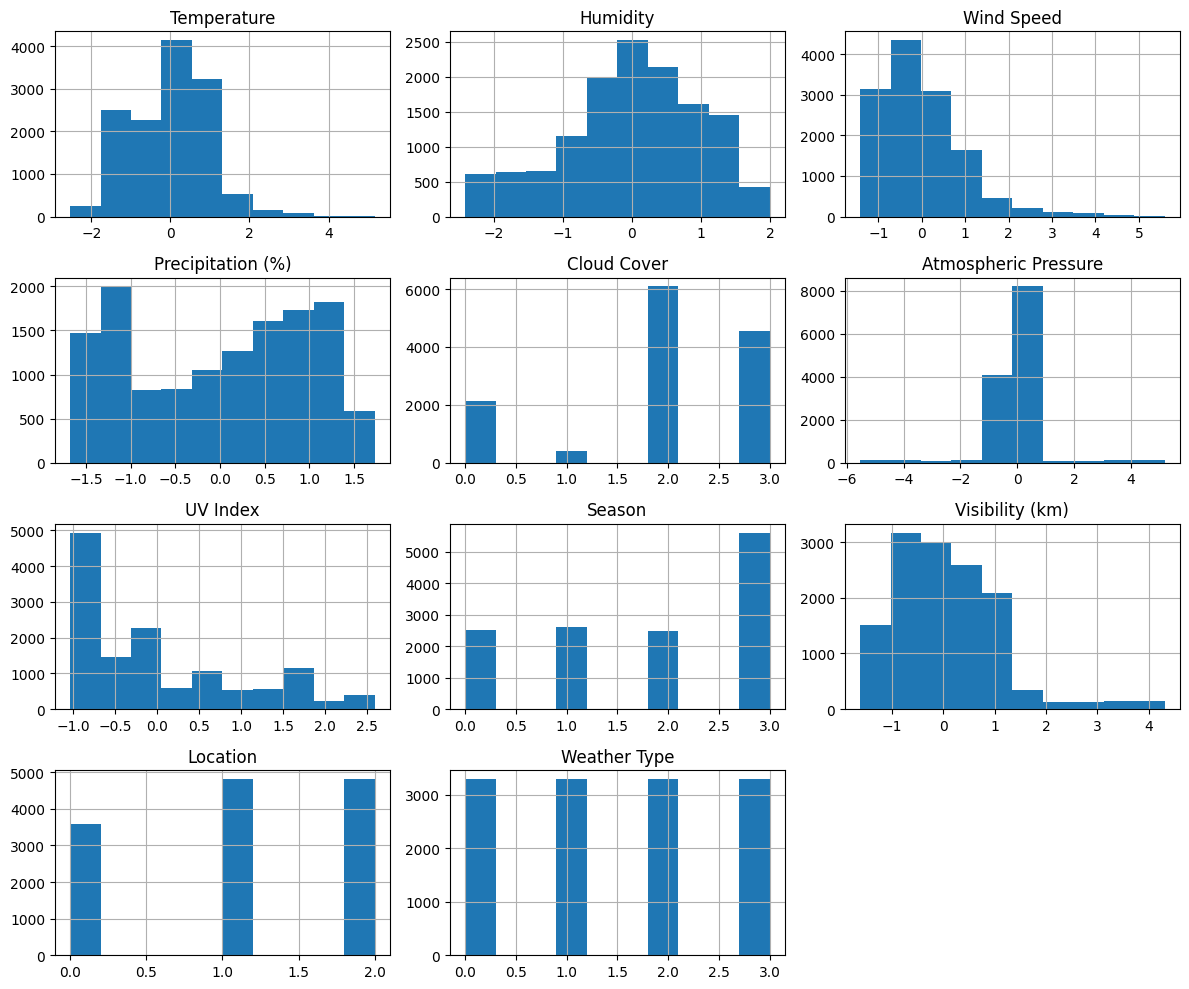

In [12]:
# Гістограми розподілу ознак
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


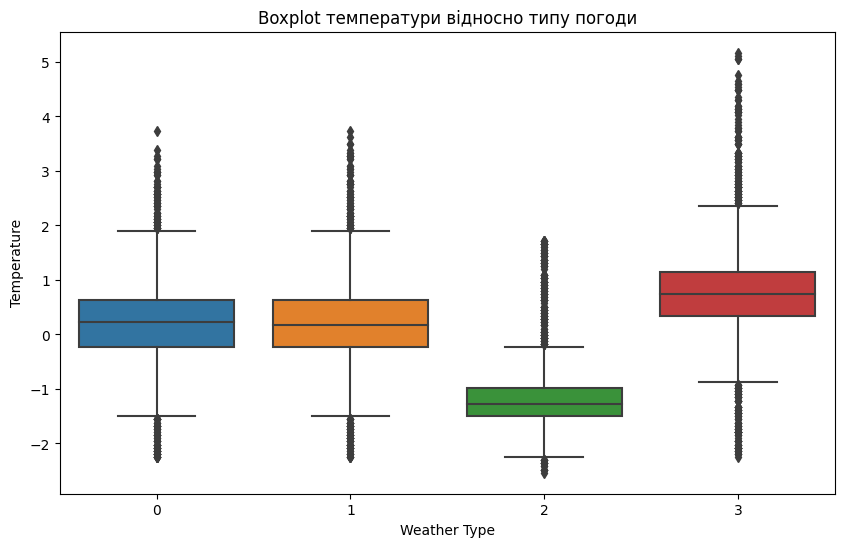

C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


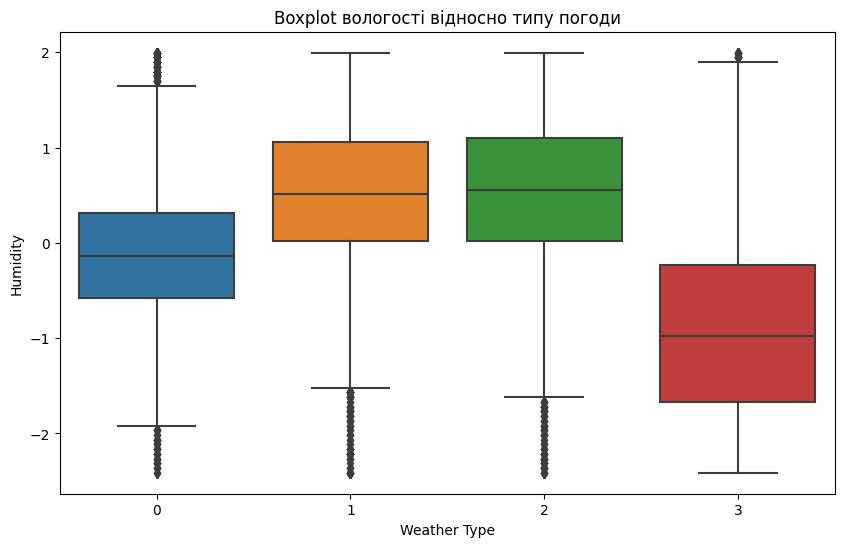

In [13]:
# Boxplot для кількох ознак щодо цільової змінної
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Type', y='Temperature', data=df)
plt.title('Boxplot температури відносно типу погоди')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Type', y='Humidity', data=df)
plt.title('Boxplot вологості відносно типу погоди')
plt.show()

In [14]:
# Відділяємо ціьову змінну
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Розділяємо дані на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--- Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       651
           1       0.90      0.89      0.90       647
           2       0.92      0.94      0.93       701
           3       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



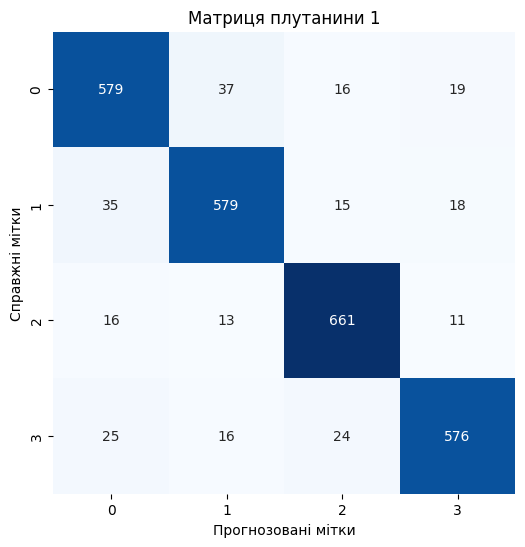

In [28]:
# Навчання моделей

# 1) Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("--- Decision Tree Classification Report")
print(classification_report(y_test, tree_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Матриця плутанини 1")
plt.xlabel("Прогнозовані мітки")
plt.ylabel("Справжні мітки")
plt.show()

--- Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       651
           1       0.91      0.91      0.91       647
           2       0.92      0.94      0.93       701
           3       0.94      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



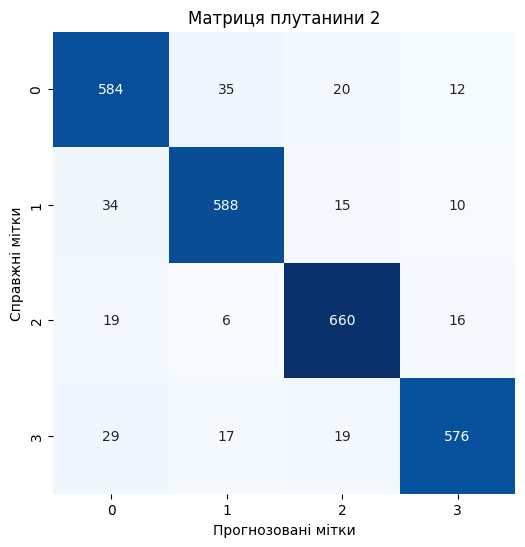

In [27]:
# 2) Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("--- Random Forest Classification Report")
print(classification_report(y_test, rf_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Матриця плутанини 2")
plt.xlabel("Прогнозовані мітки")
plt.ylabel("Справжні мітки")
plt.show()

--- AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       651
           1       0.81      0.86      0.83       647
           2       0.90      0.90      0.90       701
           3       0.93      0.82      0.87       641

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.87      0.86      0.86      2640



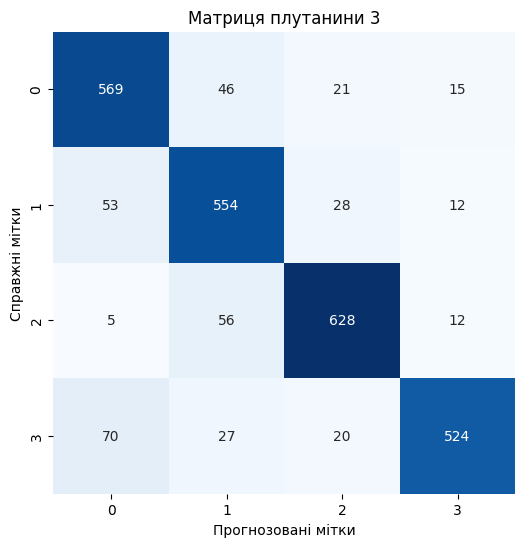

In [26]:
# 3) AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("--- AdaBoost Classification Report")
print(classification_report(y_test, ada_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Матриця плутанини 3")
plt.xlabel("Прогнозовані мітки")
plt.ylabel("Справжні мітки")
plt.show()

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Найкращі параметри для kNN: {'n_neighbors': 5}
--- KNN Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       651
           1       0.86      0.89      0.88       647
           2       0.93      0.94      0.93       701
           3       0.94      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



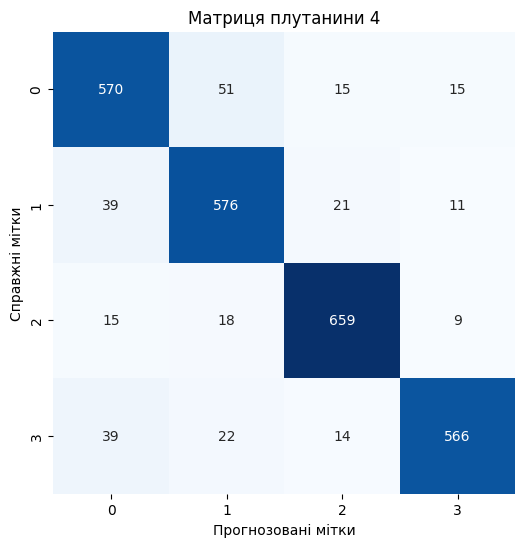

In [25]:
# 4) Підбір оптимальних параметрів для kNN
param_grid_knn = {
    'n_neighbors': range(1, 20)
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=2, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Найкращі параметри для kNN:", grid_knn.best_params_)
knn_pred = grid_knn.predict(X_test)
print("--- KNN Classification Report")
print(classification_report(y_test, knn_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Матриця плутанини 4")
plt.xlabel("Прогнозовані мітки")
plt.ylabel("Справжні мітки")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Найкращі параметри для SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
--- SVM Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       651
           1       0.88      0.90      0.89       647
           2       0.95      0.94      0.95       701
           3       0.93      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



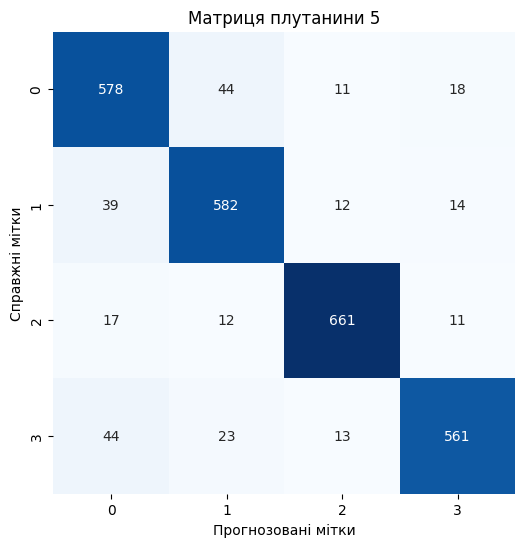

In [29]:
# 5) Підбір оптимальних параметрів для SVM за допомогою GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Найкращі параметри для SVM:", grid_svm.best_params_)
svm_pred = grid_svm.predict(X_test)
print("--- SVM Classification Report")
print(classification_report(y_test, svm_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Матриця плутанини 5")
plt.xlabel("Прогнозовані мітки")
plt.ylabel("Справжні мітки")
plt.show()

In [31]:
# Порівняння моделей за точністю
models = {
    "KNN": knn_pred,
    "SVM": svm_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_pred,
    "AdaBoost": ada_pred
}

for model_name, predictions in models.items():
    print(f"{model_name} точність: {accuracy_score(y_test, predictions)}")

best_model_name = max(models, key=lambda name: accuracy_score(y_test, models[name]))
print(f"Найкраща модель: {best_model_name}")

KNN точність: 0.8981060606060606
SVM точність: 0.9022727272727272
Decision Tree точність: 0.9071969696969697
Random Forest точність: 0.9121212121212121
AdaBoost точність: 0.8617424242424242
Найкраща модель: Random Forest
